# Chapter 3: Non-Parametric Tests

In [166]:
# Configuração para o notebook e plotagem de imagens
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm

from IPython.display import Latex
import seaborn as sns
%matplotlib inline
def jupyter_settings():
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
   # display(HTML('<style>.container { width:100% !important; }</style>'))
    sns.set()

jupyter_settings()

In the previous chapter, we discussed the parametric tests. The parametric tests are useful when test assumptions are met. However, in the real world, there are cases where those assumptions are not met. For cases like thats, we need to use non-parametric tests.

First, we will discuss the concept of a non-parametric test and after we will cover some of the most common non-parametric tests.

This chapter are divided in the following sections:

- When parametric test assumptions are violated;
- The rank-sum test;
- The signed-rank test;
- The Kruskal-Wallis test;
- The chi-square test;
- Spearman's correlation analysis;
- Chi-square power analysis.

## 1 - When parametric test assumptions are violated

The principal difference between the parametric tests and non-parametric tests is that the parametric tests assume the data are normally distributed, in the other worlds, the **non-parametric tests don't make any assumptions about the data distribution**. However, these **test will still require the samples to be independent**.

### 1.1 - Permutations test



The first non-parametric the **Permutations test**. The key to this test is to perform repeated permutations on the data to simulate the null distribution and see if the difference between two groups is large than we would expect in the case.

To understand this test, let's use the dataset that could represent counts of machine failures at low and high temperatures. We assume that the samples are independent:

In [167]:
low_temp = np.array([0, 0, 0, 0, 0,1 , 1])
high_temp = np.array([1, 2, 3, 1])

Let's see that the data does not meet parametric assumptions

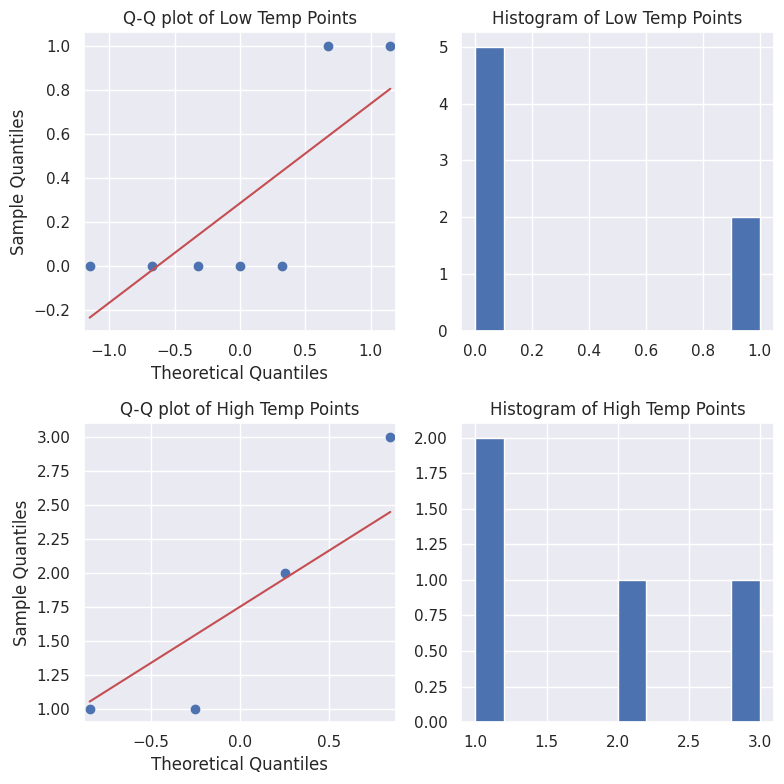

In [168]:
fig, axes = plt.subplots(2,2, figsize=(8,8))

sm.qqplot(low_temp, ax=axes[0,0], line='s')
axes[0,0].set_title("Q-Q plot of Low Temp Points")
axes[0,1].hist(low_temp)
axes[0,1].set_title("Histogram of Low Temp Points")

sm.qqplot(high_temp, ax=axes[1,0], line='s')
axes[1,0].set_title("Q-Q plot of High Temp Points")
axes[1,1].hist(high_temp)
axes[1,1].set_title("Histogram of High Temp Points")


plt.tight_layout()
plt.show()

From Q-Q plot and histogram we can see that the date are not normally. Now, we can move on. 

To construct the null hypothesis, we first need to decide on a statistical measure. For this case, we will look for a difference in the mean of the two distributions.

$$\bar{x}_{lowtemp} - \bar{x}_{hightemp}$$

In [169]:
random_gen = np.random.default_rng(42) # to reproduce the same results

permutations = []

for _ in range(5):
    all_samples = np.concatenate([low_temp, high_temp])
    permutations.append(random_gen.permutation(all_samples))

print(permutations)

[array([1, 1, 0, 1, 0, 1, 0, 0, 3, 0, 2]), array([0, 3, 0, 1, 1, 1, 1, 2, 0, 0, 0]), array([1, 0, 1, 0, 2, 3, 1, 0, 0, 1, 0]), array([0, 3, 1, 2, 0, 0, 1, 1, 0, 1, 0]), array([1, 0, 3, 0, 1, 1, 0, 2, 1, 0, 0])]


In [170]:
df_means = []
for permutation in permutations:
    mean = round(permutation[:7].mean() - permutation[7:].mean(),2)
    df_means.append(mean)

In [171]:
labels = ["Low Temp"]*len(low_temp) + ["High Temp"] * len(high_temp) + ["Mean difference"]

permutations_df = pd.DataFrame({
    "Label": labels,
    "Observed": np.concatenate([low_temp, high_temp, np.array([round(low_temp.mean() - high_temp.mean(),2)])]),
    "P1": np.concatenate([permutations[0],np.array([df_means[0]])]),
    "P2": np.concatenate([permutations[1],np.array([df_means[1]])]),
    "P3": np.concatenate([permutations[2],np.array([df_means[2]])]),
    "P4": np.concatenate([permutations[3],np.array([df_means[3]])]),
    "P5": np.concatenate([permutations[4],np.array([df_means[4]])]),
})

permutations_df

,Label,Observed,P1,P2,P3,P4,P5
0,Low Temp,0.00,1.00,0.0,1.00,0.0,1.00
1,Low Temp,0.00,1.00,3.0,0.00,3.0,0.00
2,Low Temp,0.00,0.00,0.0,1.00,1.0,3.00
3,Low Temp,0.00,1.00,1.0,0.00,2.0,0.00
4,Low Temp,0.00,0.00,1.0,2.00,0.0,1.00
5,Low Temp,1.00,1.00,1.0,3.00,0.0,1.00
6,Low Temp,1.00,0.00,1.0,1.00,1.0,0.00
7,High Temp,1.00,0.00,2.0,0.00,1.0,2.00
8,High Temp,2.00,3.00,0.0,0.00,0.0,1.00
9,High Temp,3.00,0.00,0.0,1.00,1.0,0.00


The table shows the observed data with five randomly generated permutations of the values. We calculated the difference in the mean for each permutation.

**The differences in the means are the values of the null distribution**.

Once we have the distribution, we can calculate the p-value as the proportion of values more extreme than the observed value.

In [172]:
def statistic_function(set_one, set_two):
    return np.mean(set_one) - np.mean(set_two)

perm_result = sp.stats.permutation_test( (low_temp, high_temp), statistic_function, random_state= random_gen)

In [173]:
observed_diff_means = low_temp.mean()-high_temp.mean()
print(f"The observed differences in mean of the two distributions is {observed_diff_means:.1f}")

The observed differences in mean of the two distributions is -1.5


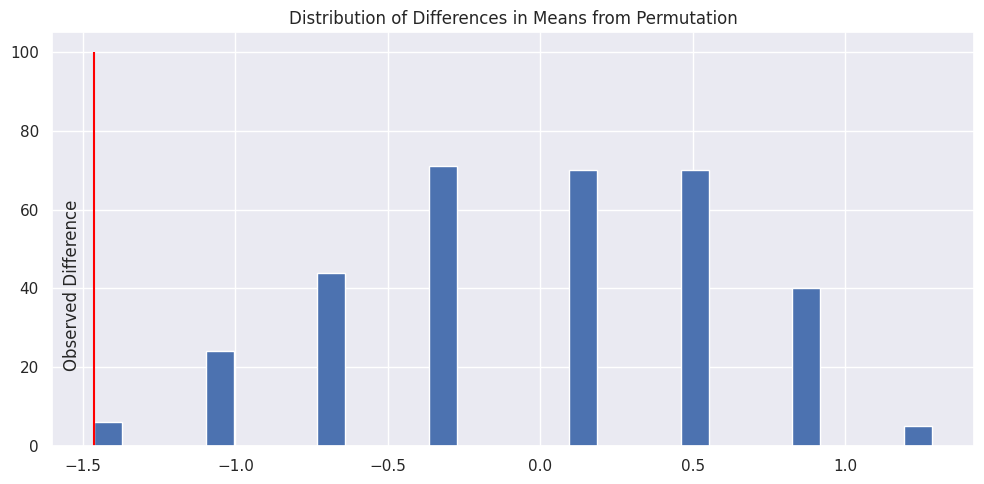

In [189]:
plt.figure(figsize=(10,5))

plt.hist(perm_result.null_distribution, bins=30)
plt.vlines(observed_diff_means, 0, 100, colors='red')

plt.text(observed_diff_means-0.1, 20, "Observed Difference", rotation=90)
plt.title("Distribution of Differences in Means from Permutation")
plt.tight_layout()
plt.show()

In [175]:
print(f"The p-value is {perm_result.pvalue:.4f}")

The p-value is 0.0364


The observed difference between the original groups is $-1.46$, which is without permutations, the mean of the group with High Temp is 1.45 unit large than of the group  with Low Temp.

The histogram shows that the red line, which is the observed difference is very left to the null distribution, which means the observed differences is a extreme value and probably did not occur by chance. This can be confirmed from the p-value = 0.0364, which is less than the level of significance $\alpha = 0.05$. We have enough evidences to reject the null hypothesis and affirm that is a difference between the two groups.

## 2 - The Rank-Sum Test

When the assumptions of the t-test are not met, the Rank-Sum test is often a good non-parametric test alternative test. While the t-test can be used to test for the **difference between the means of two distributions**, the Rank-Sum test is used to test for **difference between the locations of two distributions**.

The null hypothesis of the Rank-Sum test is that the distribution underlying the first sampe is the same as the second sample. Of tje sample distributions appear t\\o be similar, this allows us to use the Rank-Sum test to test for the difference in the locations of the two samples.

### 2.1 - The test statistic procedure

The procedure for the Rank-Sum test we need follow the steps:

1. Combine all sample values into one set and sort the samples in ascending order, keeping track of their labels.
2. Assign ranks to all samples starting with rank 1 for the lowest sample value.
3. Where ties occur, replace the rank of the tied values with the mean rank of the tied values.
4. Sum the ranks for the smallest sample group, which is the test statistic $T$.

Once the test statistic is calculated, the p-value can be calculated. The p-value can be done with a normal approximation or with an exact method. The exact method is only used when the sample size is small (less than 8 samples).

### 2.2 - Normal Approximation

We approximate the p-value with a z-score

$$Z = \frac{T-Mean(T)}{STDEV(T)}$$

where $Mean(T) = n_T\bar{R}$ and $STDEV(T) = S_R \sqrt{\frac{n_T n_o}{n_T + n_o}}$

In the equations here, $n_T$ is the number of samples in the group used to calculate $T$, $n_o$ is the number of samples in the other group, $\bar{R}$ is the mean of the corrected ranks, and $S_R$ is the standard deviation of the corrected ranks.

Once $Z$ is calculated, the corresponding p-value can be looked up for the z-distribution. 

Now, let't go at an example.

### 2.3 - Runk-Sum example

In [176]:
# package for reading rda files
import pyreadr

data = pyreadr.read_r('gpa_iq.rda')
data= data["gpa_iq"]
data

,obs,gpa,iq,gender,concept
0,1,7.940,111,2,67
1,2,8.292,107,2,43
2,3,4.643,100,2,52
3,4,7.470,107,2,66
4,5,8.882,114,1,58
...,...,...,...,...,...
73,85,9.000,112,1,60
74,86,9.500,112,1,70
75,87,6.057,114,2,51
76,88,6.057,93,1,21


In [177]:
data.size

390

We want to look at the difference in IQ of students who scored in the top percent (90th percentile and above) and in the bottom 10 percent (10th percentile and below) of the group.

In [178]:
lower_bound, upper_bound = np.percentile(data.concept.values, [10, 90], method='closest_observation')

higher_score_iq = data[data.concept >= upper_bound]['iq']
higher_score_iq_mean = np.mean(higher_score_iq)

lower_score_iq = data[data.concept <= lower_bound]['iq']
lower_score_iq_mean = np.mean(lower_score_iq)

print(f"The lower 10% score is {lower_bound} and the upper 10% score is {upper_bound}")
print(f"The mean lower 10% score is {lower_score_iq_mean:.2f} and the mean upper lower 10% is {higher_score_iq_mean:.2f} ")

The lower 10% score is 39 and the upper 10% score is 70
The mean lower 10% score is 97.00 and the mean upper lower 10% is 118.27 


We can plot the distribution of IQ score for the students in the top 10% and the distribution of IQ score for the students in the bottom 10%.

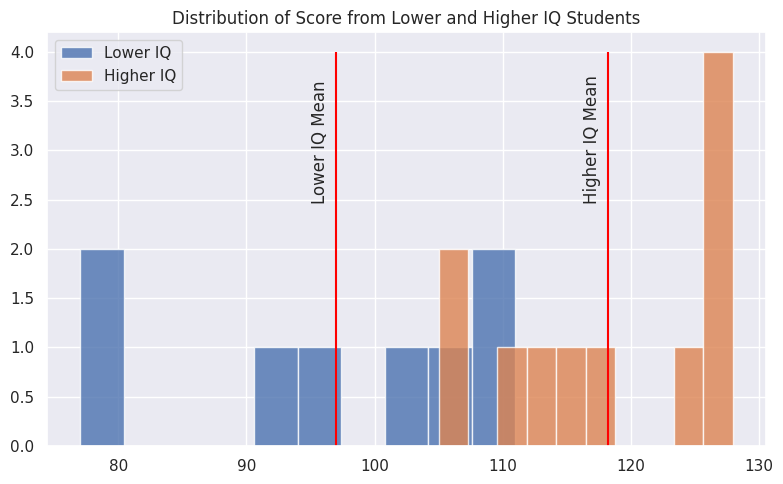

In [179]:
fig = plt.figure(figsize=(8, 5))

plt.hist(lower_score_iq, label="Lower IQ", alpha=0.8)
plt.vlines(lower_score_iq_mean, 0, 4, colors='red')
plt.text(lower_score_iq_mean-2, 2.5, "Lower IQ Mean", rotation=90)

plt.hist(higher_score_iq, label='Higher IQ', alpha=0.8)
plt.vlines(higher_score_iq_mean, 0, 4, color='red')
plt.text(higher_score_iq_mean-2, 2.5, "Higher IQ Mean", rotation = 90)

plt.legend()
plt.title("Distribution of Score from Lower and Higher IQ Students")

plt.tight_layout()
plt.show()

#### Check the Assumptions

Recall for the t-test there are 3 assumptions:

1. The datasets are normally distributed
2. The datasets have equal variance (though we can use Welch's t-test with unequal variances)
3. The samples are independent

We will assume the assumption of independence is met, but we need keep in mind that we do not know how this data was sampled. Let's check the other two assumptions in the cells below.

#### Normality

Looking in the histogram and the Q-Q plots we can verify the normality

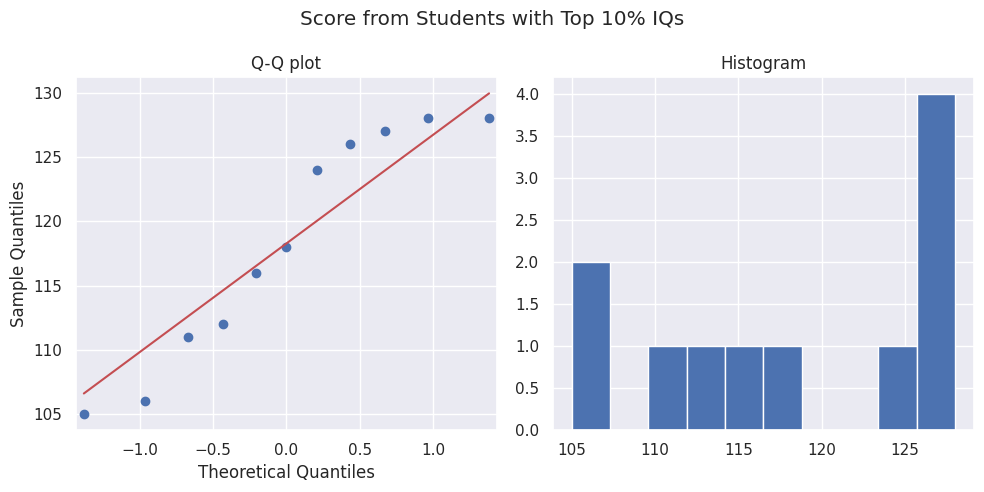

In [180]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sm.qqplot(higher_score_iq, line='s', ax=ax[0])
ax[0].set_title("Q-Q plot")

ax[1].hist(higher_score_iq)
ax[1].set_title("Histogram")

fig.suptitle("Score from Students with Top 10% IQs")
plt.tight_layout()
plt.show()

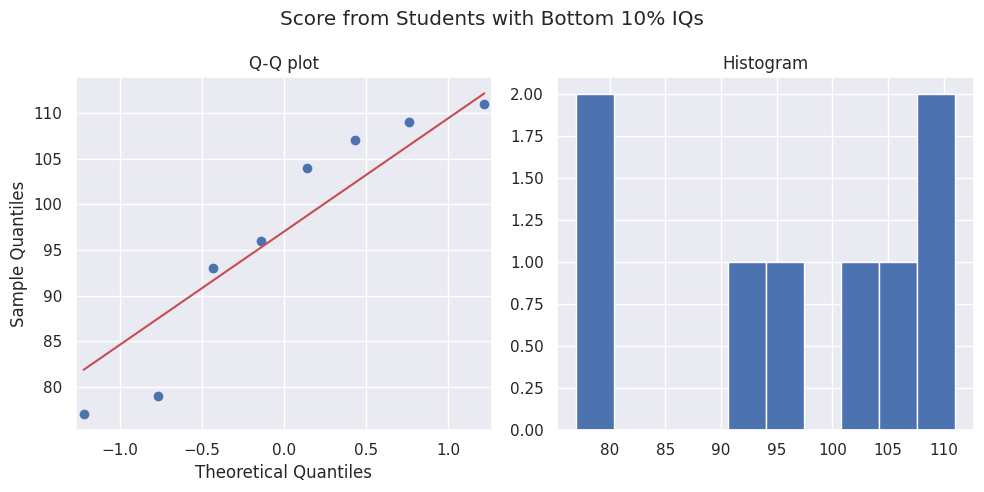

In [181]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sm.qqplot(lower_score_iq, line='s', ax=ax[0])
ax[0].set_title("Q-Q plot")

ax[1].hist(lower_score_iq)
ax[1].set_title("Histogram")

fig.suptitle("Score from Students with Bottom 10% IQs")
plt.tight_layout()
plt.show()

Based on the plots above, we can assume that the data is not normally distributed.

#### Equal Variances

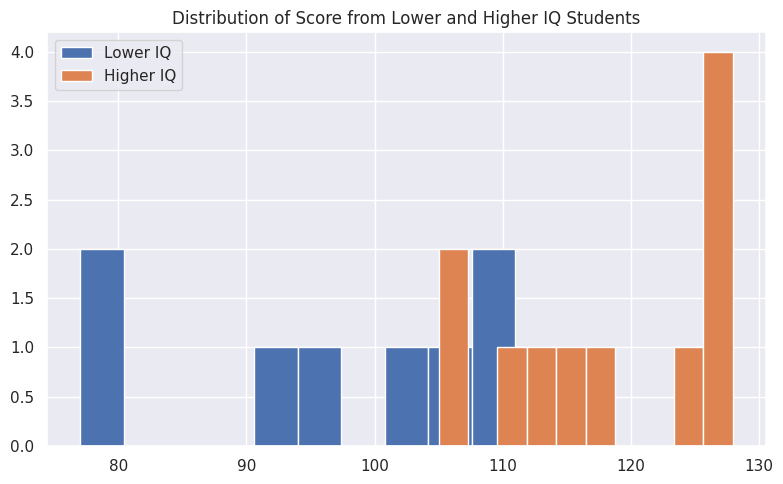

In [182]:
fig = plt.figure(figsize=(8,5))

plt.hist(lower_score_iq, label='Lower IQ')
plt.hist(higher_score_iq, label='Higher IQ')

plt.legend()
plt.title("Distribution of Score from Lower and Higher IQ Students")

plt.tight_layout()
plt.show()

Based on the above plot, we can see that we have different variances.

The assessment showed that both the assumption of normality and the assumption of equal variance appear to be violated.

When the assumptions of the t-test are violated, the results will be invalid. As discussed a non-parametric alternative test is the Rank-Sum test.

In [183]:
print(f"The p-value for two-tailed is {sp.stats.mannwhitneyu(higher_score_iq, lower_score_iq).pvalue:.4f}")
print(f"The p-value for right-tailed is {sp.stats.mannwhitneyu(higher_score_iq, lower_score_iq, alternative='greater').pvalue:.4f}")

The p-value for two-tailed is 0.0022
The p-value for right-tailed is 0.0011


The results of Rank-Sum test shows a p-value of 0.0022 for two-tailed, which is less than the level of significance 0.05. And for right-tailed is 0.0011, which indicates that the Higher IQs are shifted to the right.

So, we have enough evidences to reject the null hypothesis, which is **the distributions of the two populations are equal**. So, we can affirm that the two populations don't have the same distributions.

#### Other example

In this example, we want to compare the recovery times of patients with two different treatments.

Imagine a hospital is testing two treatments for post-operative pain. The gols is to see if there is a significant difference in recovery times between the two treatments.

- Group 1 take the Treatments A:
- Group 2 take the Treatments B:
- We take the measures the recovery times (by day) for each patient.

In [184]:
treatment_A = np.array([7, 9, 6, 8, 5])
treatment_B = np.array([10, 12, 14, 11, 13])

In [187]:
# applying the Rank-Sum test
stat, p_value = sp.stats.mannwhitneyu(treatment_A, treatment_B, alternative='two-sided')

print(f"The Statistic is {stat} and the corresponded p-value is {p_value:.4f}")


The Statistic is 0.0 and the corresponded p-value is 0.0079


The p-value is less than the level of significance, we can reject the null hypothesis. And we have enough evidences to affirm that one treatments is different to the other.

## 3 - The Signed-Rank Test

This test is robust to outliers because of the use of ranks and medians instead of means in the null and alternative hypothesis.
The null hypothesis considers that the median difference between stage 1 and stage 2 is zero. Similar, as in a paired t-test, for the alternative hypothesis.


- **Two-tailed:** $$H_0: Md_{stg1} - Md_{stg2} = 0 \hspace{1cm} H_a: Md_{stg1} - Md_{stg2} \neq 0$$ 
- **One-tailed (right-railed/left-tailed):** $$H_0: Md_{stg1} - Md_{stg2} = 0 \hspace{1cm} H_a: Md_{stg1} - Md_{stg2} \geq(\leq) 0$$ 

The normality requirement is relaxed, but the test yet requires independence between paired observations and these observations to be from the same population. In addition, the dependent variable is required to be continuous.

To compute the test statistic, there are the following procedures:

1. Calculate the differences in each pair between the two stages;
2. Drop pairs with zero difference, if they exist;
3. Take the absolute difference between each pair and rank them from smallest to largest;
4. Calculate the signed-rank statistic *S* by summing the rank with a positive sign.



In [221]:
before_treatment = np.array([37, 14, 22, 12, 24, 35, 35, 51, 39])
after_treatment = np.array([38, 17, 19, 7, 15, 25, 24, 38, 19])
abs_diff = np.abs(before_treatment-after_treatment)
sign = ['+' if before_treatment[n]- after_treatment[n] > 0 else '-' for n in range(len(before_treatment))]
ranks = sp.stats.rankdata(abs_diff)
pair = list(range(1, 10))

In [222]:
data_signed_rank = pd.DataFrame({
    "Pair": pair,
    "Before_treatments": before_treatment,
    "After_treatments": after_treatment,
    "Abs_diff": abs_diff,
    "Sign": sign,
    "Rank": ranks
})

data_signed_rank

,Pair,Before_treatments,After_treatments,Abs_diff,Sign,Rank
0,1,37,38,1,-,1.0
1,2,14,17,3,-,2.5
2,3,22,19,3,+,2.5
3,4,12,7,5,+,4.0
4,5,24,15,9,+,5.0
5,6,35,25,10,+,6.0
6,7,35,24,11,+,7.0
7,8,51,38,13,+,8.0
8,9,39,19,20,+,9.0


The second and the third pairs have the same absolute difference, their ranks are computed by averaging their original rank, (2+3)/2=2.5.

The null and alternative hypothesis for a one-sided test are as follows;

- The null hypothesis: $$H_0: Md_{before} - Md_{after} = 0$$
- The alternative hypothesis: $$H_a: Md_{before} - Md_{after} \leq 0$$

The signed-rank statistic is the sum of ranks for positive differences and it is given follows:

In [235]:
S = 0
for n in range(len(before_treatment)):
    if sign[n] == '+':
        S += ranks[n]


The mean of *S* is:

$$Mean(S) = \frac{n(n+1)}{4} = \frac{9 * 10}{4} = 22.5$$

and the standard deviation of *S* is:
$$SD(S) = \sqrt{\frac{n(n+1)(2n+1)}{24}} = \sqrt{\frac{9*10*9}{24}} = 8.44$$

Then, the test statistic is calculated by the following formula:
$$Z_{statistic} = \frac{S-Mean(S)}{SD(S)} = \frac{41.5-22.5}{8.44} = 2.2511$$

We can use `scipy.stats.norm.sf()` to calculate the approximate one-sided p-value using the $Z_{statistic}$

In [240]:
#The approximation
print(f"The approximation using the stats.norm.sf() for p-value is {sp.stats.norm.sf(abs(2.2511)):.4f}")

The approximation using the stats.norm.sf() for p-value is 0.0122


However, we can use the function `wilcoxon()` to calculate the p-value

In [241]:
# Signed Rank Test

sp.stats.wilcoxon(before_treatment, after_treatment, alternative='greater')

WilcoxonResult(statistic=np.float64(41.5), pvalue=np.float64(0.01171875))

At $\alpha = 0.05$, the p-value is 0.0017. Therefore, we reject the null hypothesis. There is strong evidence that the median before the treatment is greater than the median after the treatment.

## 4 - TheKruskal-Wallis Test

The Kruskal-Wallis Test is an alternative to the one-way ANOVA test, the difference is Kruskal test used the medians instead of the means to test whether there are statistically significant differences between two or more independent groups.

In [248]:
group1 = [8, 13, 13, 15, 12, 10, 6, 15, 13, 9]
group2 = [16, 17, 14, 14, 15, 12, 9, 12, 11, 9]
group3 = [7, 8, 9, 9, 4, 15, 13, 9, 11, 9]

The null and alternative hypotheses are:

- $H_0:$ The medians are equal among these three groups;
- $H_a:$ The medians are not equal among these three groups.

In [249]:
# Kruskal-Wallis Test

sp.stats.kruskal(group1,group2,group3)

KruskalResult(statistic=np.float64(5.7342701722574905), pvalue=np.float64(0.056861597028239855))

As $\alpha - 0.05$, the level of significance - with p-value > $\alpha$, we fail to reject the null hypothesis. There is no strong evidence to show that the medians are not equal across these three groups.

## 5 - The Chi-square distribution

Before we start with the chi-test, let's see what is the Chi-square distribution.

The Chi-Square distribution is a continuo probability distribution, that is very useful to make inference in the standard deviation and categorical variables. 

The null and alternative hypothesis are:

- Null Hypothesis: $$H_0: \sigma^2_\chi = \sigma^2_0$$
- The Alternative Hypothesis:
    - One-tailed right tail: $$H_0: \sigma^2_\chi \geq \sigma^2_0$$
    - One-tailed left tail: $$H_0: \sigma^2_\chi \leq \sigma^2_0$$
    - Two-sided: $$H_0: \sigma^2_\chi \neq \sigma^2_0$$


Where  $\sigma^2_\chi$ is the observed distribution variance and $\sigma^2_0$ is the expected variance.

When the population data can be assumed to be normally distributed, is similar to the F-test in that the two variances are being compared and the result is 1 when both are the same.


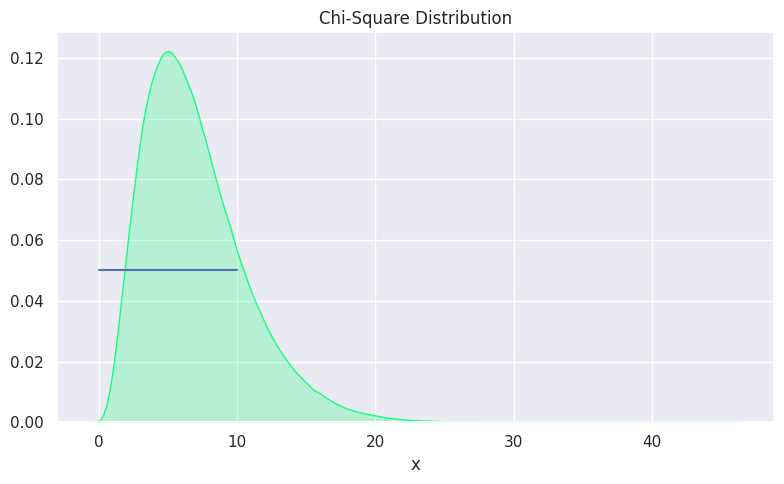

In [263]:
fig = plt.figure(figsize=(8, 5))

x = np.random.chisquare(7, size=1000000) # Chi distribution with 7 degrees of freedom
ax = sns.kdeplot(x=x, fill=True, color='#17FF7D')
ax.set(ylabel=None)
plt.plot([0,10],[0.05,0.05])
ax.set_title("Chi-Square Distribution")
ax.set_xlabel("x")

plt.tight_layout()
plt.show()

## 6 - The Chi-Square goodness-of-fit

The Chi-Square Goodness-of-fit compares the count of occurrences of multiple factor levels for a single variable (factor) to determine whether the levels are statistically equal. 

For example: A vendor offers three models of phones - three levels of the single factor (phone) - to customers, who purchase in total an average of 90 phone per week. We can say that the expect frequency is 1/3, so, 30 phones of each model are sold per week, on average.

The Person's chi-square test statistic, is calculated by measuring the **observed frequencies against expected frequencies**. The linear equation for this test statistic is as follows:

$$ \chi^2 = \sum \frac{(O_i -E_i)^2}{E_i}$$

Where $O_i$ is the observed frequency, $E_i$ is the expected frequency, and the degrees of freedom = k-1, where k is the number of factor levels.

In our exemple the vendor the expected frequency of 1/3 but is not actually what is observed; the vendor sells an average of 45, 30 and 15.

Suppose we want to know whether this observed frequency differs with statistical significance from the expected frequency. The null hypothesis is that the frequencies are equal, and we can formulate the Pearson's chi-squared test statistic as follows:

$$ \chi^2 = \frac{(45-30)^2}{30} + \frac{(30-30)^2}{30} + \frac{(15-30)^2}{30} = 15 $$

Suppose we want to use a hypothesis test (right-tailed) with 0.05 level of significance.

The chi-square critical value for a level of significance of 0.05 with $df = 3-1=2$ degrees of freedom.

First we can see the $\chi^2$ distribution for df=2.

0.024999556842777583


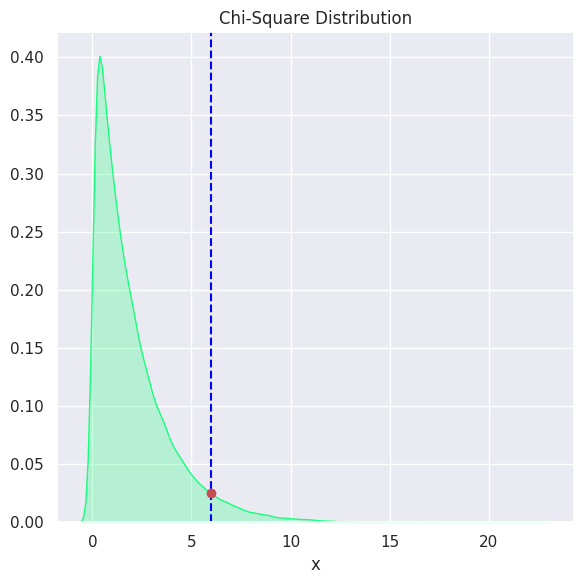

In [302]:
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

# Gerar dados
x = sp.stats.chi2.rvs(2, size=10**5)  # Chi-square distribution with 2 degrees of freedom

# Plotar KDE
fig = plt.figure(figsize=(6, 6))
ax = sns.kdeplot(x=x, fill=True, color='#17FF7D')
ax.set(ylabel=None)

# Calcular a densidade em x = 5.9915
from scipy.stats import chi2
density_at_59915 = chi2.pdf(5.9915, df=2)
print(density_at_59915)
# Plotar linha vertical e ponto de interseção
plt.axvline(5.9915, color='blue', linestyle='--')
plt.plot(5.9915, density_at_59915, 'ro')  # Ponto de interseção

# Configurações do gráfico
ax.set_title("Chi-Square Distribution")
ax.set_xlabel("x")
plt.tight_layout()
plt.show()

The critical value of chi-squared is given by

In [268]:
from scipy.stats import chi2
chi_square_critical_value =chi2.ppf(1-0.05, df=2)
print(f"The Chi-square critical value is {chi_square_critical_value:.4f}")

The Chi-square critical value is 5.9915
